## Homework 7

Name:
Collaborators:  

Due Wednesday 21

We want to solve the linear system given by 
\begin{equation}
Ax = b,
\end{equation}
where $A$ is a non-singular $n\times n$ matrix. 

In this homework you will find the $LU$ factorization of the Matrix $A$, such that 
\begin{equation}
L\cdot U = A,
\end{equation}
where $L$ is lower triangular and $U$ is upper triangular. 

If the LU factors are known, then solving the linear system can be performed in two triangular solves:
\begin{equation}
Lp = b,
\end{equation}
and 
\begin{equation}
Ux = p.
\end{equation}


### Question 1: Linear Solver

#### LU factorization
Q1: Write a function that computes the LU factorization of a non-singular $n\times n$ matrix $A$. The input of your function will be

- A a non singular matrix;

and the output will be a tuple $(L,U)$, such that $L\cdot U = A$, where 

- L is a lower triangular matrix,
- U is an upper triangular matrix.

Moreover, your function will raise an error if: 

- the matrix A is not square,
- the matrix A is singular.

You can use the built-in function det(), to check if you matrix is singular. 

In [ ]:
function luFactorization(A)
    # input A: a nxn matrix
    # output L: lower triangular matrix
    #        U: upper triangular matrix
    return (L,U)
end    

#### Triangular solves

Q1b: Write a function that implements a upper triangular solve.
The input of your function will be 

- U an non-singular upper triangular matrix,
- b a right-hand side;

your function will output $x$, the solution to $Ux = b$

In [ ]:
# write your triangular solver here
function backwardSubstitution(U,b)
    # input:    U upper triangular matrix 
    #           b vector
    # output:   x = U\b
    
    
    return x
end

Q1c: Write a function that implements a lower triangular solve.
the input of your function will be :

- L an non-singular lower triangular matrix,
- b a right-hand side;

your function will output $x$, the solution to $Lx = b$

In [29]:
# write your triangular solver here
function forwardSubstitution(L,b)
    # input:    L lower triangular matrix 
    #           b vector
    # output:   x = L\b

    return x
end

forwardSubstitution (generic function with 1 method)

#### Linear solvers

Q1d. Using your LU factorization and triangular solves, write a function that solves $Ax = b$.

Your function will check that the dimensions of $A$ and $b$ are consistent.

In [ ]:
function linearSolve(A,b)
    
    return x
end

### Question 2: Pivoted LU factorization

As for Gaussian Elimination, we can encounter small pivots that may have a negative impact on the accuracy of the factorization. In order to avoid that we use partial pivoting (row pivoting) to reorder the unknowns. 


#### PLU factorization
Q1: Write a function that computes the pivoted LU factorization of the non-singular $n\times n$ matrix $A$. The input of your function will be

- A a non singular matrix

and the output will be a tuple $(L,U,P)$, such that $L\cdot U = P\cdot A$, where 

- P a sparse permutation matrix 
- L is a lower triangular matrix
- U is an upper triangular matrix

Moreover, your function will raise an error if: 

- the matrix A is not square
- the matrix A is singular

You can use the built-in function det(), to check if you matrix is singular. 

In [ ]:
function rowSwap!(A, i,j)
    # input:   A matrix
    #          i,j the row indexes to be swapped
    n = size(A)[1]
    # checking that i and j are within the permitted range
    (i > n || j > n ) && error("Index out of range in the rowSwap")
    # if the index are not the same
    if i != j 
        buffer = A[i,:]
        A[i,:] = A[j,:]
        A[j,:] = buffer
    end
end

In [ ]:
function luFactorizationPivoted(A)
    # write your function
    
    return (L,U,P)
end    

Q2b. Using your triangular solvers, write a function that solves the system $Ax = b$ using a partially pivoted LU factorization. 

In [30]:
function linearSolvePivoted(A,b)
    
    return x
end

linearSolvePivoted (generic function with 1 method)

### Question 3 (bonus): Solving the Helmholtz equation  (10 points)

The complexity of LU factorization is $\mathcal{O}(n^3)$ for a dense $n\times n$ matrix. 

Fortunately, most of the matrices arising from discretization of partial differential equations are not dense. 
In this case we will solve the 2D Helmholtz equation given by

\begin{equation}
\triangle u + \omega^2m u = f
\end{equation}
plus absorbing boundary conditions. <br>

The Helmholtz equation models waves propagating in an acoustic medium (like air or water). 
You will download the extra file Homework_7_extra.jl in the same folder as this ipybn, and you will run the snippet below. 

We will first define the number of points

In [ ]:
# Pkg.add("PyPlot")
using PyPlot
include("Homework_7_extra.jl")
nx = 200
ny = 200
N = nx*ny
h = 1/(nx-1)

We will define the slowness $ m $ as a matrix full of ones, and we will call the function HelmholtzMatrix

In [2]:
m = ones(nx,nx)
# adding a reflector
m[round(Integer,nx/3):end, :]  = 2;
H = HelmholtzMatrix(m,nx,ny, 10, h,300, 2,2*pi*nx/10 );
println("Average number of nonzeros per row is : ", nnz(H)/N)

Average number of nonzeros per row is :4

As you can see, the matrix is extremely sparse, it only contains around 5 non zeros per row. <br>
We will define a source, which in this case is a point source in the middle of the domain.

In [7]:
f = zeros(N,1);
f[nx*ny/2+ny/2] = 1/h^2;


Now we are ready to compute our solution. For that we will use the built-in LU factorization in Julia. (you may note that H is sparse, then by default julia will use UMFPACK to perform the factorization)

In [8]:
# perform the factorization
@time LU = lufact(H);
# solve the linear system
@time u = LU\f;

  0.315283 seconds (77 allocations: 87.847 MB, 1.36% gc time)
  0.019535 seconds (22 allocations: 8.839 MB)


The solution is just a long vector, we need to reshape in order to plot it

In [5]:
U = reshape(u,nx,ny);

We can plot the solution using Gadfly, the solution is a complex number so we will plot the real and the imaginary part separately.

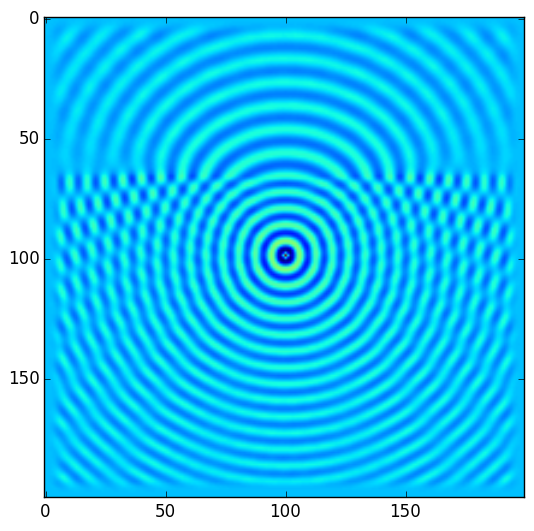

PyObject <matplotlib.image.AxesImage object at 0x320320990>

In [9]:
imshow(real(U))

Q3a. You will benchmark the time it takes to compute the LU factorization and to perform the solve with respect to the size of the problem $N$. What is the complexity of the factorization and the triangular solves in this case? How is that different from what you have seen in class? How can you explain the difference?

Hint: You may wnat to use the LU factorization algorithm you wrote (for a small $nx$) to obtain the LU factors. You can count the number of non-zeros of $L$ given by your algorithm and the number of nonzeros of $LU[:L]$, and compare them. You can use the function nnz(A) to obtain the number of nonzeros of a matrix.

### Question 4 (bonus): Full Pivoted LU Decomposition (10 points)

Q4a. Write a function that implements the fully pivoted LU factorization of the non-singular $n\times n$ matrix $A$. The input of your function will be

- A a non singular matrix

and the output will be a tuple $(L,U,P,Q)$, such that $L\cdot U = P\cdot A \cdot Q$, where 

- P a sparse permutation matrix 
- Q a sparse permutation matrix
- L is a lower triangular matrix
- U is an upper triangular matrix

Moreover, your function will raise an error if: 

- the matrix A is not square
- the matrix A is singular

You can use the built-in function det(), to check if you matrix is singular. 




In [ ]:
function luFactorizationFullPivoted(A)
    # checks
    
    return (L,U,P,Q)
end    